# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face detection
Task is to predict the boundaries(mask) around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Great Learning/AdvancedCV/')

### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [0]:
import numpy as np
data = np.load('images.npy',allow_pickle=True)

In [6]:
!ls

images		   model-1.60.h5  model-1.86.h5  model-2.12.h5
images.npy	   model-1.61.h5  model-1.87.h5  model-2.13.h5
images_racoon.rar  model-1.62.h5  model-1.88.h5  model-2.14.h5
model-0.23.h5	   model-1.63.h5  model-1.89.h5  model-2.15.h5
model-0.25.h5	   model-1.64.h5  model-1.90.h5  model-2.16.h5
model-0.29.h5	   model-1.65.h5  model-1.91.h5  model-2.17.h5
model-0.39.h5	   model-1.66.h5  model-1.92.h5  model-2.18.h5
model-0.40.h5	   model-1.67.h5  model-1.93.h5  model-2.19.h5
model-0.41.h5	   model-1.68.h5  model-1.94.h5  model-2.20.h5
model-0.45.h5	   model-1.69.h5  model-1.95.h5  model-2.22.h5
model-0.48.h5	   model-1.70.h5  model-1.96.h5  model-2.23.h5
model-0.49.h5	   model-1.71.h5  model-1.97.h5  model-2.24.h5
model-0.60.h5	   model-1.72.h5  model-1.98.h5  model-2.26.h5
model-0.62.h5	   model-1.73.h5  model-1.99.h5  model-2.27.h5
model-0.63.h5	   model-1.74.h5  model-2.00.h5  model-2.28.h5
model-0.68.h5	   model-1.75.h5  model-2.01.h5  model-2.29.h5
model-0.69.h5	   model-1.76.h5 

In [5]:
data.shape

(409, 2)

### Check one sample from the loaded "images.npy" file  (2 marks)

In [7]:
print(data[1])

[array([[[207, 216, 227, 255],
        [206, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 216, 227, 255],
        ...,
        [ 35,  32,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       [[207, 216, 227, 255],
        [207, 216, 227, 255],
        [207, 215, 227, 255],
        ...,
        [ 35,  33,  33, 255],
        [ 35,  33,  34, 255],
        [ 35,  33,  34, 255]],

       ...,

       [[ 31,  21,  17, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

       [[ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        [ 31,  22,  18, 255],
        ...,
        [  0,   1,   4, 255],
        [  0,   1,   4, 255],
        [  0,   1,   4, 255]],

       [[ 3

### Set image dimensions   (1 mark)
- Initialize image height, image width with value: 224 

In [0]:
image_width = 224
image_height = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X_train" array
- Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), image_height,image_width ))
X_train = np.zeros((int(data.shape[0]), image_height, image_width, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(image_height, image_width), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * image_width)
        x2 = int(i["points"][1]['x'] * image_width)
        y1 = int(i["points"][0]['y'] * image_height)
        y2 = int(i["points"][1]['y'] * image_height)
        masks[index][y1:y2, x1:x2] = 1

### Print the shape of X_train and mask array  (1 mark)

In [10]:
X_train.shape

(409, 224, 224, 3)

In [11]:
masks.shape

(409, 224, 224)

### Print a sample image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

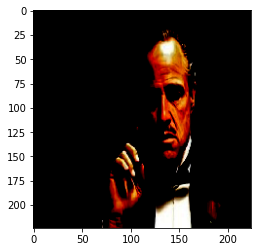

In [13]:
from matplotlib import pyplot
n = 10
print(X_train[n])
pyplot.imshow(X_train[n])

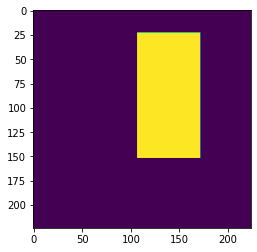

In [14]:
pyplot.imshow(masks[n])

## Create the model (10 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
ALPHA = 1.0 

EPOCHS = 50 
BATCH_SIZE = 32 
HEIGHT_CELLS = 28
WIDTH_CELLS = 28

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model

def create_model(trainable=True):
  
    model = MobileNet(input_shape=(image_height, image_width, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output
    block4 = model.get_layer("conv_pw_3_relu").output
    block5 = model.get_layer("conv_pw_1_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block4])
    x = Concatenate()([UpSampling2D()(x), block5])

    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="relu")(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((image_height, image_width))(x)

    return Model(inputs=model.input, outputs=x)

### Call the create_model function

In [18]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()
# Print summary
model.summary()

17227776/17225924 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_____________________________

### Define dice coefficient function (5 marks)
- Create a function to calculate dice coefficient


In [0]:
import tensorflow as tf
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

### Compile the model (2 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define checkpoint and earlystopping

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

### Fit the model (2 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: checkpoint, reduce_lr, stop

In [23]:
model.fit(x=X_train,epochs=EPOCHS,
          y=masks,
          batch_size = 1,
          callbacks=[checkpoint, reduce_lr, stop],
          workers=1,
          use_multiprocessing=False,
                    shuffle=True,
          verbose=1
                    )

Streaming output truncated to the last 5000 lines.
Epoch 00044: loss did not improve from 0.51381
373/409 [==========================>...] - ETA: 1s - loss: 1.0605 - dice_coefficient: 0.4952
Epoch 00044: loss did not improve from 0.51381

Epoch 00044: loss did not improve from 0.51381
375/409 [==========================>...] - ETA: 1s - loss: 1.0645 - dice_coefficient: 0.4937
Epoch 00044: loss did not improve from 0.51381

Epoch 00044: loss did not improve from 0.51381
377/409 [==========================>...] - ETA: 1s - loss: 1.0633 - dice_coefficient: 0.4940
Epoch 00044: loss did not improve from 0.51381

Epoch 00044: loss did not improve from 0.51381
379/409 [==========================>...] - ETA: 1s - loss: 1.0618 - dice_coefficient: 0.4944
Epoch 00044: loss did not improve from 0.51381

Epoch 00044: loss did not improve from 0.51381
381/409 [==========================>...] - ETA: 0s - loss: 1.0619 - dice_coefficient: 0.4941
Epoch 00044: loss did not improve from 0.51381

Epoch 000

### Get the predicted mask for a sample image   (3 marks)

[[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.96078432]]

 [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


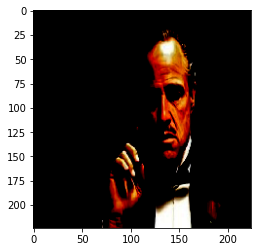

In [24]:
n = 10
sample_image = X_train[n]

#### Add your code here ####
print(sample_image)
pyplot.imshow(sample_image)

(224, 224)


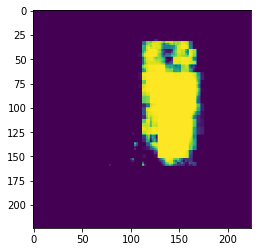

In [25]:
# To predict the box

region = model.predict(x=np.array([sample_image]))[0] # Predict the BBox
print(region.shape)

pyplot.imshow(region)

### Impose the mask on the image (3 marks)

In [26]:
regionReshaped = np.reshape(region, region.shape + (1,))
print(regionReshaped.shape)

(224, 224, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


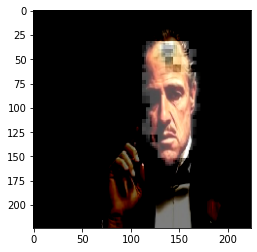

In [27]:
pyplot.imshow(X_train[n] * (1.0 - 0.6) + regionReshaped * 0.7)